In [573]:
# import the required libraries
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [574]:
# load the dataset and view the shape of the dataframe
df = pd.read_csv('Customer-Churn.csv')
df.shape

(7043, 21)

In [575]:
# randomly view five records
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5542,2990-OGYTD,Female,0,Yes,No,67,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),86.15,5883.85,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
2322,1306-RPWXZ,Female,0,No,Yes,49,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.45,1024.65,No
182,9367-WXLCH,Male,0,No,No,8,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),84.50,662.65,Yes
981,1106-HRLKZ,Male,0,Yes,Yes,40,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.60,808.95,No


In [576]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [577]:
# drop the customerID column which is not necessary
df.drop(columns= ['customerID'], axis= 1, inplace= True)

# view the datatype of each column
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [578]:
# view the values of 'TotalCharges'
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [579]:
# remove the rows where 'TotalCharges' is Null
df = df[df['TotalCharges'] != ' ']

In [580]:
# shape of the dataframe after removing the rows 
df.shape

(7032, 20)

In [581]:
# now convert 'TotalCharges' into numeric datatype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

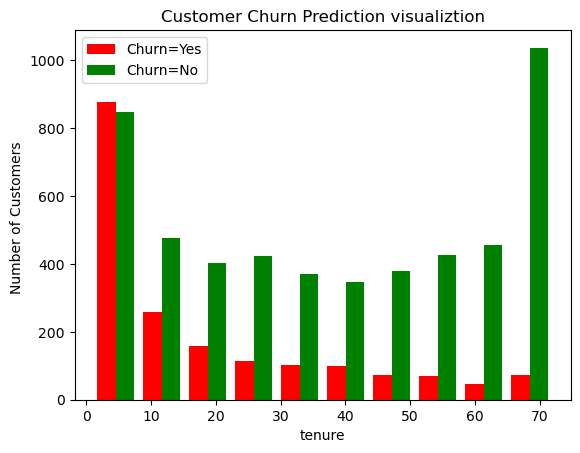

In [582]:
# plotting the number of customers who have churned and not churned against tenure

tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of Customers ")
plt.title("Customer Churn Prediction visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

# we can see that more customers who churn have lower tenure and as the tenure increases the number of customers
# who churn becomes low

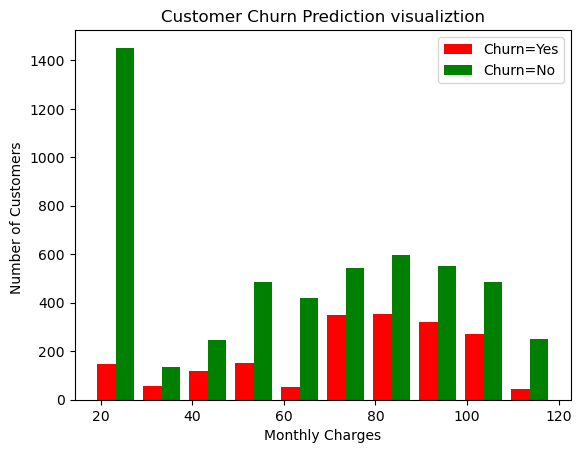

In [583]:
# plotting the number of customers who have churned and not churned against MonthlyCharges

mc_churn_no = df[df.Churn == 'No'].MonthlyCharges
mc_churn_yes = df[df.Churn == 'Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers ")
plt.title("Customer Churn Prediction visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [584]:
# define a function to view the unique values in categorical columns

def unique_col_val(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(column, df[column].unique())

In [585]:
# call the above defined function on the dataframe
unique_col_val(df)

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [586]:
# replace No service values with No in the entire dataframe 

df.replace('No internet service', 'No', inplace = True)
df.replace('No phone service', 'No', inplace = True)

In [587]:
unique_col_val(df)

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [588]:
# in the columns with values 'Yes' and 'No', replace Yes with 1 and No with 0.

# make a list of columns with values 'Yes' and 'No'
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
'DeviceProtection', 'TechSupport' , 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

# replace 'Yes' with 1 and 'No' with 0 for the columns defined above
for col in yes_no_columns:
    df[col].replace({'Yes': 1, 'No': 0}, inplace = True)

In [589]:
# also replace Male and Female values in gender column with 1 and 0
df.gender.replace({'Male': 1, 'Female': 0}, inplace = True)

In [590]:
# one hot encode the below defined columns

df = pd.get_dummies(data = df, columns = ['InternetService', 'Contract', 'PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [591]:
# now view the datatype of all the columns after replacing and encoding.
df.dtypes

# there are no string datatypes, so the dataframe is ready to build models

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [592]:
# scale the continuous numerical columns into the range 0 and 1

from sklearn.preprocessing import MinMaxScaler

col_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()
df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

In [593]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4720,1,1,0,0,0.887324,1,1,0,0,1,1,1,1,0,0.834328,0.769594,0,0,1,0,0,1,0,0,0,1,0
5924,1,0,1,1,0.859155,1,0,0,0,0,0,0,0,0,0.023881,0.138432,0,0,0,1,0,0,1,0,1,0,0
5488,1,1,1,0,0.619718,1,1,0,1,1,1,1,0,1,0.800498,0.520078,0,0,1,0,0,1,0,1,0,0,0
6071,1,0,1,1,1.000000,1,1,1,0,1,0,1,1,1,0.868657,0.868157,0,0,1,0,0,0,1,1,0,0,0
4299,0,1,0,0,0.394366,1,1,1,1,0,0,0,0,1,0.400995,0.196186,0,1,0,0,1,0,0,1,0,0,0


In [594]:
# define X (features) and y (target variable) 

X = df.drop('Churn', axis = 1)
y = df['Churn']

In [595]:
# divide X and y for training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46)

In [596]:
X_train.shape, X_test.shape

((5625, 26), (1407, 26))

In [597]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [598]:
# define a function which creates a Neural Network, builds a model by fitting the training set, 
# evaluates the performance of the model on the test set and returns the predicted values for X_test

def ANN(X_train, y_train, X_test, y_test, loss = 'binary_crossentropy'):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    print(model.summary())
    
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=100)
    
    print(model.evaluate(X_test, y_test))
    
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    
    print("Classification Report: \n", classification_report(y_test, y_pred))
    
    return y_pred

In [599]:
# call the above defined function

y_pred = ANN(X_train, y_train, X_test, y_test)

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_168 (Dense)           (None, 26)                702       
                                                                 
 dense_169 (Dense)           (None, 15)                405       
                                                                 
 dense_170 (Dense)           (None, 1)                 16        
                                                                 
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.4848 - accuracy: 0.7540
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.7900
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.7952
Epoch 4

176/176 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8263
Epoch 74/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3717 - accuracy: 0.8228
Epoch 75/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3713 - accuracy: 0.8263
Epoch 76/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8236
Epoch 77/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3704 - accuracy: 0.8251
Epoch 78/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.8247
Epoch 79/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8270
Epoch 80/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 0.8236
Epoch 81/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3687 - accuracy: 0.8247
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 

Text(95.72222222222221, 0.5, 'Actual')

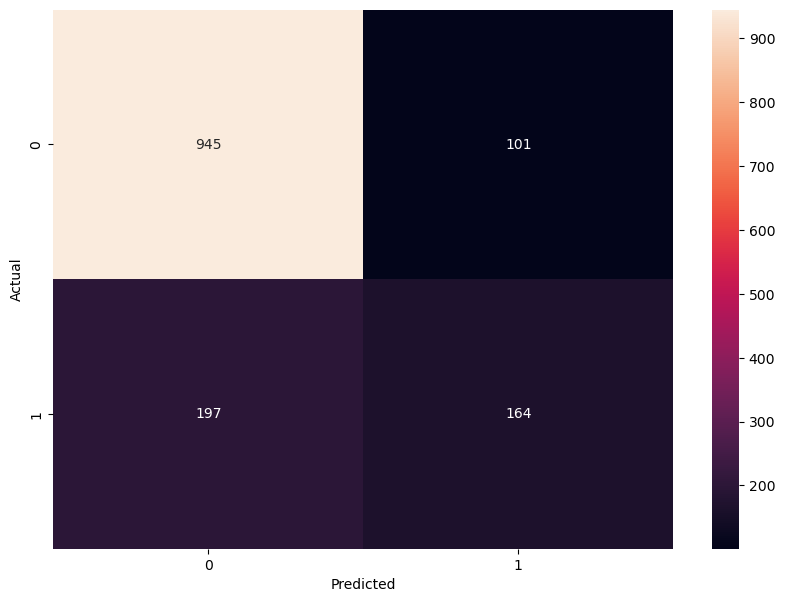

In [600]:
# plot a heatmap for the confusion matrix of the above model

import seaborn as sns

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
plt.figure(figsize = (10,7))
                               
sns.heatmap (cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [601]:
# we can see that the dataset is imblanced: there are more customers who haven't churned than those who have churned
# so, we use different regularization techniques to balance the dataset and then build a model

In [602]:
print(y.value_counts(), '\n',y_train.value_counts(), '\n',y_test.value_counts())

0    5163
1    1869
Name: Churn, dtype: int64 
 0    4117
1    1508
Name: Churn, dtype: int64 
 0    1046
1     361
Name: Churn, dtype: int64


# Downsampling


In [603]:
# create 2 dataframes for the two different classes in the target column

count_class_0, count_class_1 = df.Churn.value_counts()

df_class_0 = df[df.Churn == 0]
df_class_1 = df[df.Churn == 1]

In [604]:
df_class_0.shape, df_class_1.shape

((5163, 27), (1869, 27))

In [605]:
# Downsample the dataframe with the majority of the records, i.e, the dataframe where Churn is 0 to contain the number
# of records equal to the number of records present in the dataframe with churn value 1

df_class_0_down = df_class_0.sample(count_class_1)

# merge the downsampled dataframe with churn value 0 and the dataframe with churn value 1
df_down = pd.concat([df_class_0_down, df_class_1], axis = 0)

print(df_down.Churn.value_counts())

0    1869
1    1869
Name: Churn, dtype: int64


In [606]:
# create the objects for training and testing for the Downsampled dataframe

X = df_down.drop('Churn', axis = 1)
y = df_down['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46, stratify = y)

In [607]:
X_train.shape, X_test.shape

((2990, 26), (748, 26))

In [608]:
# create a model using the Downsampled set and get the predicted values for X_test
y_pred = ANN(X_train, y_train, X_test, y_test)

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_171 (Dense)           (None, 26)                702       
                                                                 
 dense_172 (Dense)           (None, 15)                405       
                                                                 
 dense_173 (Dense)           (None, 1)                 16        
                                                                 
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6184 - accuracy: 0.6967
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5148 - accuracy: 0.7559
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4965 - accuracy: 0.7585
Epoch 4/100
9

94/94 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.8077
Epoch 75/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8100
Epoch 76/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.8104
Epoch 77/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8087
Epoch 78/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8057
Epoch 79/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4045 - accuracy: 0.8097
Epoch 80/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8124
Epoch 81/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8070
Epoch 82/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.8120
Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4027 - accuracy: 0.8120
Epoch 84/100


# Oversampling

In [609]:
# Oversample the dataframe for class 1 and concatenate the dataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print(df_over.Churn.value_counts())

0    5163
1    5163
Name: Churn, dtype: int64


In [610]:
# create the objects for training and testing for the Oversampled dataframe

X = df_over.drop('Churn', axis = 1)
y = df_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46, stratify = y)

In [611]:
X_train.shape, X_test.shape

((8260, 26), (2066, 26))

In [612]:
# create a model using the Oversampled set and get the predicted values for X_test
y_pred = ANN(X_train, y_train, X_test, y_test)

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_174 (Dense)           (None, 26)                702       
                                                                 
 dense_175 (Dense)           (None, 15)                405       
                                                                 
 dense_176 (Dense)           (None, 1)                 16        
                                                                 
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5389 - accuracy: 0.7386
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy: 0.7558
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4837 - accuracy: 0.7613
Epoch 4

259/259 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8309
Epoch 74/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3767 - accuracy: 0.8276
Epoch 75/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3748 - accuracy: 0.8321
Epoch 76/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8300
Epoch 77/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3746 - accuracy: 0.8300
Epoch 78/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8310
Epoch 79/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8318
Epoch 80/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8345
Epoch 81/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.8354
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3732 - accuracy: 

# SMOTE

In [613]:
# Import the SMOTE module to oversample the minority class
from imblearn.over_sampling import SMOTE

# Create a SMOTE object and fit_resample X and y to oversample the minority class
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Print the number of occurrences of each class in y_sm to check the balance
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [614]:
# split X and y for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 46, stratify=y_sm)

In [615]:
X_train.shape, X_test.shape

((8260, 26), (2066, 26))

In [616]:
y_train.value_counts(), y_test.value_counts()

# y_train and y_test both consist of equal number of records of each class

(0    4130
 1    4130
 Name: Churn, dtype: int64,
 0    1033
 1    1033
 Name: Churn, dtype: int64)

In [617]:
# create a model using the set oversampled by SMOTE and get the predicted values for X_test
y_pred = ANN(X_train, y_train, X_test, y_test)

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_177 (Dense)           (None, 26)                702       
                                                                 
 dense_178 (Dense)           (None, 15)                405       
                                                                 
 dense_179 (Dense)           (None, 1)                 16        
                                                                 
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5494 - accuracy: 0.7248
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4942 - accuracy: 0.7581
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4840 - accuracy: 0.7638
Epoch 4

259/259 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8331
Epoch 74/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8344
Epoch 75/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8354
Epoch 76/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.8332
Epoch 77/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3691 - accuracy: 0.8352
Epoch 78/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8357
Epoch 79/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3691 - accuracy: 0.8381
Epoch 80/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3666 - accuracy: 0.8373
Epoch 81/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3683 - accuracy: 0.8369
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 

# Ensemble with undersampling

In [618]:
# create the objects for training and testing 

X = df.drop('Churn', axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 46, stratify = y)

In [619]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

In [620]:
y_train.value_counts(), y_test.value_counts()

(0    4130
 1    1495
 Name: Churn, dtype: int64,
 0    1033
 1     374
 Name: Churn, dtype: int64)

In [621]:
# create 2 dataframes for class 0 and class 1 using the training set

df_ensemble = X_train.copy()
df_ensemble['Churn'] = y_train

df_ensemble_0 = df_ensemble[df_ensemble.Churn == 0]
df_ensemble_1 = df_ensemble[df_ensemble.Churn == 1]

In [622]:
df_ensemble_0.shape, df_ensemble_1.shape

((4130, 27), (1495, 27))

In [623]:
# define a function to slice the above created dataframe for class 0 and return X_train and y_train after merging
# it with the dataframe for class 1
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train 

In [624]:
# the ratio of number of records with class 0 to the number of records with class 1 to roughly 3:1
# so we do 3 slices (of almost length) of the datafram of class 0
# 4130/3 is roughly equal to 1377

In [625]:
# First slice
X_train, y_train = get_train_batch(df_ensemble_0, df_ensemble_1, 0, 1377)

print(X_train.shape, X_test.shape)

# create a model using the set oversampled by SMOTE and get the predicted values for X_test for the first slice
y_pred1 = ANN(X_train, y_train, X_test, y_test)

(2872, 26) (1407, 26)
Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 26)                702       
                                                                 
 dense_181 (Dense)           (None, 15)                405       
                                                                 
 dense_182 (Dense)           (None, 1)                 16        
                                                                 
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
90/90 [==============================] - 1s 2ms/step - loss: 0.6291 - accuracy: 0.6842
Epoch 2/100
90/90 [==============================] - 0s 1ms/step - loss: 0.5184 - accuracy: 0.7636
Epoch 3/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy

90/90 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8155
Epoch 75/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4127 - accuracy: 0.8162
Epoch 76/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8148
Epoch 77/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8106
Epoch 78/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8071
Epoch 79/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8210
Epoch 80/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8162
Epoch 81/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8148
Epoch 82/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8162
Epoch 83/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8165
Epoch 84/100


In [626]:
# Second slice
X_train, y_train = get_train_batch(df_ensemble_0, df_ensemble_1, 1377, 1377*2)

print(X_train.shape, X_test.shape)

# create a model using the set oversampled by SMOTE and get the predicted values for X_test for the second slice
y_pred2 = ANN(X_train, y_train, X_test, y_test)

(2872, 26) (1407, 26)
Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_183 (Dense)           (None, 26)                702       
                                                                 
 dense_184 (Dense)           (None, 15)                405       
                                                                 
 dense_185 (Dense)           (None, 1)                 16        
                                                                 
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
90/90 [==============================] - 1s 2ms/step - loss: 0.6617 - accuracy: 0.6065
Epoch 2/100
90/90 [==============================] - 0s 1ms/step - loss: 0.5296 - accuracy: 0.7535
Epoch 3/100
90/90 [==============================] - 0s 1ms/step - loss: 0.5000 - accuracy

90/90 [==============================] - 0s 1ms/step - loss: 0.3986 - accuracy: 0.8141
Epoch 75/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.8151
Epoch 76/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8162
Epoch 77/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8186
Epoch 78/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.8165
Epoch 79/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3936 - accuracy: 0.8196
Epoch 80/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3942 - accuracy: 0.8189
Epoch 81/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8189
Epoch 82/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8224
Epoch 83/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3916 - accuracy: 0.8169
Epoch 84/100


In [627]:
# Third slice
X_train, y_train = get_train_batch(df_ensemble_0, df_ensemble_1, 1377*2, 1377*3)

print(X_train.shape, X_test.shape)

# create a model using the set oversampled by SMOTE and get the predicted values for X_test for the third slice
y_pred3 = ANN(X_train, y_train, X_test, y_test)

(2871, 26) (1407, 26)
Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_186 (Dense)           (None, 26)                702       
                                                                 
 dense_187 (Dense)           (None, 15)                405       
                                                                 
 dense_188 (Dense)           (None, 1)                 16        
                                                                 
Total params: 1,123
Trainable params: 1,123
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
90/90 [==============================] - 1s 2ms/step - loss: 0.5997 - accuracy: 0.7001
Epoch 2/100
90/90 [==============================] - 0s 1ms/step - loss: 0.5097 - accuracy: 0.7583
Epoch 3/100
90/90 [==============================] - 0s 1ms/step - loss: 0.4948 - accuracy

90/90 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8224
Epoch 75/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8262
Epoch 76/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8224
Epoch 77/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3935 - accuracy: 0.8248
Epoch 78/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8307
Epoch 79/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3927 - accuracy: 0.8262
Epoch 80/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8265
Epoch 81/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8241
Epoch 82/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3872 - accuracy: 0.8311
Epoch 83/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3867 - accuracy: 0.8300
Epoch 84/100


In [628]:
# define a function that classifies a record into class 1 or 0 by taking the majority vote
# in the above defined ensemble models, if more than 1 model classifies a sample as 1, then that sample belongs to class 1.
# else, it belongs to class 0

y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [629]:
# view the classification report of the ensemble model
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1033
           1       0.49      0.77      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.74      1407



In [ ]:
# since this is an imbalanced dataset and as our class of interest in the target variable is 1, we concentrate on the
# f1-score of the models:

# model without Regularization: 0.52

# model after Downsampling: 0.73 

# model after Oversampling: 0.81

# model after using SMOTE Oversampling: 0.81

# model after Ensemble Downsampling: 0.60

# we can see that the models which are normally Oversampled and Oversampled using SMOTE are performing well in identifying
# the records with class 1 in the Target variable